In [1]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Serie-A-50-33-17-data.csv')
df = df[['Teams','Home_Goals','Away_Goals']]
df

,Teams,Home_Goals,Away_Goals
0,Atalanta,1.97650,1.6929
1,Bologna,1.36140,1.2565
2,Cagliari,1.18870,0.8929
3,Empoli,1.26910,0.9393
4,Fiorentina,1.67440,1.1685
5,Frosinone,0.98942,0.8098
6,Genoa,1.03430,0.8209
7,Verona,1.32140,1.0936
8,Inter,2.28420,1.8400
9,Juventus,1.79430,1.3609


In [4]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

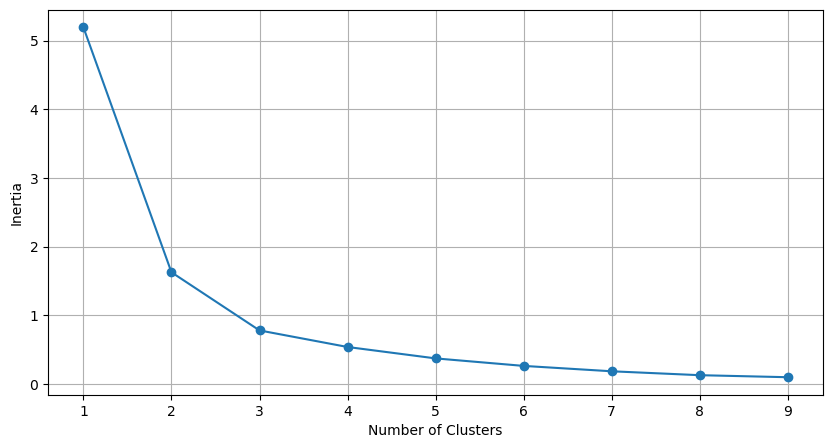

In [5]:
optimise_k_means(df[['Home_Goals','Away_Goals']], 10)

In [6]:
kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(df[['Home_Goals','Away_Goals']])

KMeans(n_clusters=5, n_init=10)

In [7]:
df['kmeans_5'] = kmeans.labels_
df

,Teams,Home_Goals,Away_Goals,kmeans_5
0,Atalanta,1.97650,1.6929,4
1,Bologna,1.36140,1.2565,3
2,Cagliari,1.18870,0.8929,0
3,Empoli,1.26910,0.9393,0
4,Fiorentina,1.67440,1.1685,2
5,Frosinone,0.98942,0.8098,0
6,Genoa,1.03430,0.8209,0
7,Verona,1.32140,1.0936,3
8,Inter,2.28420,1.8400,1
9,Juventus,1.79430,1.3609,2


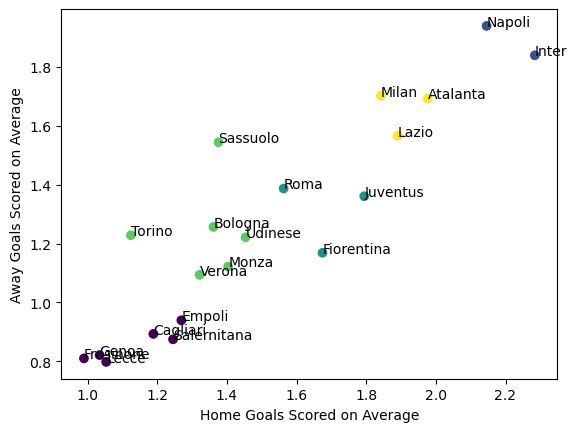

In [8]:
x=df['Home_Goals']
y=df['Away_Goals']
team=["Atalanta","Bologna","Cagliari","Empoli","Fiorentina","Frosinone","Genoa","Verona","Inter","Juventus","Lazio",
      "Lecce","Milan","Monza","Napoli","Roma","Salernitana","Sassuolo","Torino","Udinese"]
plt.scatter(x=df['Home_Goals'], y=df['Away_Goals'],c=df['kmeans_5'])
plt.xlabel('Home Goals Scored on Average')
plt.ylabel('Away Goals Scored on Average')
for i, txt in enumerate(team):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [9]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df[['Home_Goals','Away_Goals']])
    df[f'KMeans_{k}'] = kmeans.labels_
df

,Teams,Home_Goals,Away_Goals,kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,Atalanta,1.97650,1.6929,4,0,0,2,2,3
1,Bologna,1.36140,1.2565,3,0,1,1,3,0
2,Cagliari,1.18870,0.8929,0,0,1,0,1,2
3,Empoli,1.26910,0.9393,0,0,1,0,1,2
4,Fiorentina,1.67440,1.1685,2,0,1,1,0,4
5,Frosinone,0.98942,0.8098,0,0,1,0,1,2
6,Genoa,1.03430,0.8209,0,0,1,0,1,2
7,Verona,1.32140,1.0936,3,0,1,0,3,0
8,Inter,2.28420,1.8400,1,0,0,2,2,1
9,Juventus,1.79430,1.3609,2,0,0,1,0,4


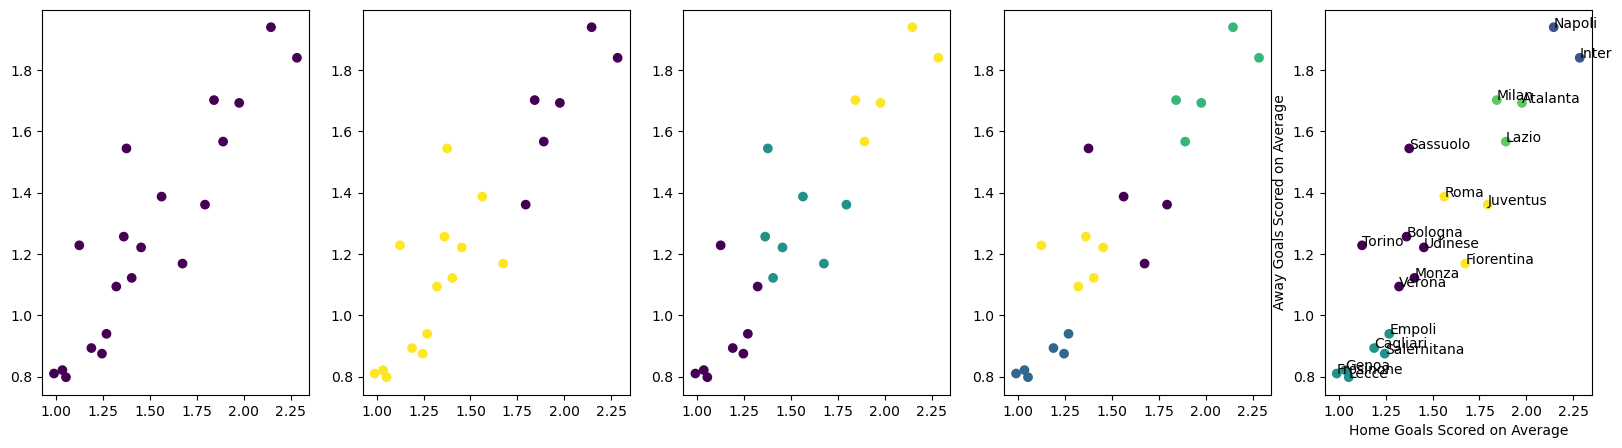

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Home_Goals'], y=df['Away_Goals'],c=df[f'KMeans_{i}'])
for i, txt in enumerate(team):
    x=df['Home_Goals']
    y=df['Away_Goals']
    team=["Atalanta","Bologna","Cagliari","Empoli","Fiorentina","Frosinone","Genoa","Verona","Inter","Juventus","Lazio",
        "Lecce","Milan","Monza","Napoli","Roma","Salernitana","Sassuolo","Torino","Udinese"]
    plt.annotate(txt, (x[i], y[i]))
    plt.xlabel('Home Goals Scored on Average')
    plt.ylabel('Away Goals Scored on Average')